## Red neuronal
El código tiene como objetivo entrenar y guardar un modelo de red neuronal para predecir si un punto en el mapa representa un incendio o no. En resumen, el código carga los datos de un archivo CSV, divide los datos en conjuntos de entrenamiento y prueba, normaliza las variables, define la arquitectura de la red neuronal, compila el modelo, entrena la red neuronal y evalúa la precisión de la red. Finalmente, guarda el modelo y los pesos del modelo en dos archivos diferentes. Además, se guarda un escalador para normalizar las variables cuando se hacen predicciones en nuevos datos. También se calcula una matriz de confusión para evaluar la precisión del modelo.

In [16]:
from pickle import dump
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar datos de entrenamiento
dataset = pd.read_csv('./CompleteDataset.csv')
X = dataset.iloc[:, :15].values
y = dataset.iloc[:, 15].values

In [3]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [4]:
# escalado de variables (normalización)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
# guardar el escalador para usarlo en la predicción de nuevos datos
dump(sc_X, open('scaler.pkl', 'wb'))

In [5]:
# Definir la arquitectura de la red
model = keras.Sequential()
model.add(keras.layers.Dense(units=16, kernel_initializer="uniform",
                             activation="sigmoid", input_dim=15))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [6]:
# Compilar el modelo
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])


In [7]:
# Entrenar la red
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
          validation_data=(X_test, y_test))

Epoch 1/50
163/163 [==============================] - 1s 3ms/step - loss: 0.5596 - accuracy: 0.6925 - val_loss: 0.4273 - val_accuracy: 0.8563
Epoch 2/50
163/163 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.8964 - val_loss: 0.3036 - val_accuracy: 0.9101
Epoch 3/50
163/163 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.9256 - val_loss: 0.2377 - val_accuracy: 0.9301
Epoch 4/50
163/163 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.9385 - val_loss: 0.1998 - val_accuracy: 0.9416
Epoch 5/50
163/163 [==============================] - 0s 2ms/step - loss: 0.1840 - accuracy: 0.9443 - val_loss: 0.1760 - val_accuracy: 0.9485
Epoch 6/50
163/163 [==============================] - 0s 2ms/step - loss: 0.1660 - accuracy: 0.9477 - val_loss: 0.1598 - val_accuracy: 0.9516
Epoch 7/50
163/163 [==============================] - 0s 2ms/step - loss: 0.1535 - accuracy: 0.9518 - val_loss: 0.1482 - val_accuracy: 0.9554
Epoch 

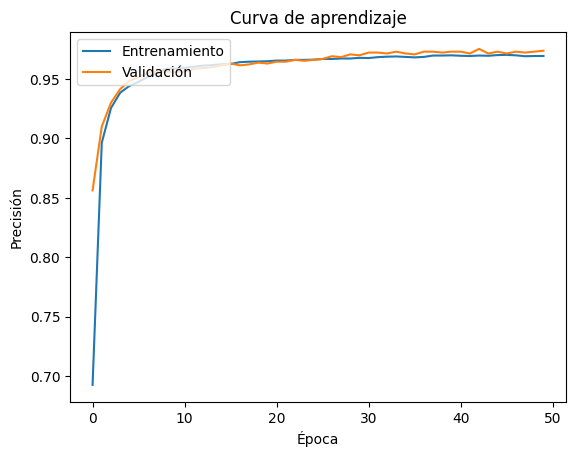

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Curva de aprendizaje')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [11]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

41/41 [==============================] - 0s 1ms/step - loss: 0.0920 - accuracy: 0.9739
Loss: 0.09199132025241852
Accuracy: 0.9738662838935852


In [12]:
# Precision del modelo
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

41/41 [==============================] - 0s 1ms/step - loss: 0.0920 - accuracy: 0.9739

accuracy: 97.39%


41/41 [==============================] - 0s 1ms/step
[[716   4]
 [ 30 551]]


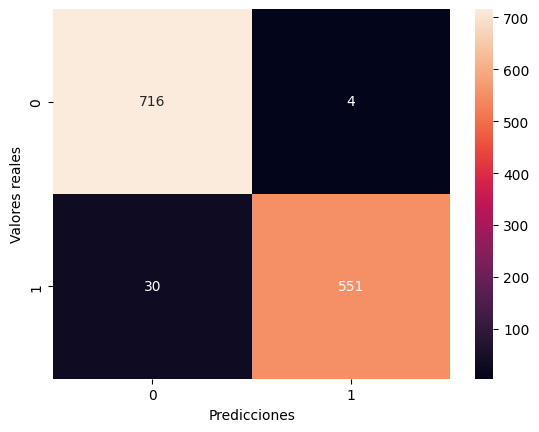

In [13]:
# convertir a binario para la matriz de confusión
y_train_bin = to_categorical(y_train)
y_test_bin = to_categorical(y_test)
y_pred = model.predict(X_test)
y_pred_bin = to_categorical(y_pred.round())

# matriz de confusión
cm = confusion_matrix(
    y_test_bin.argmax(axis=1), y_pred_bin.argmax(axis=1))
print(cm)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()


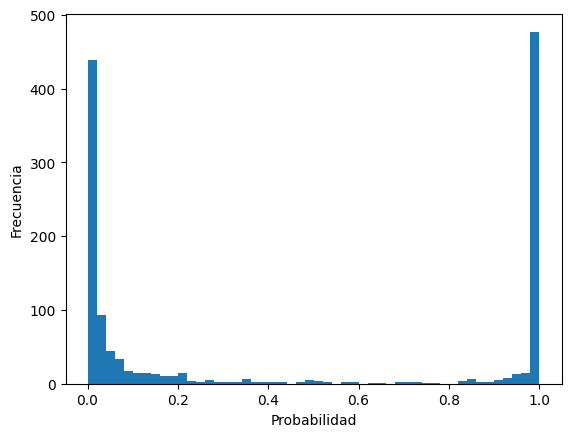

In [14]:
plt.hist(y_pred.flatten(), bins=50)
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.show()

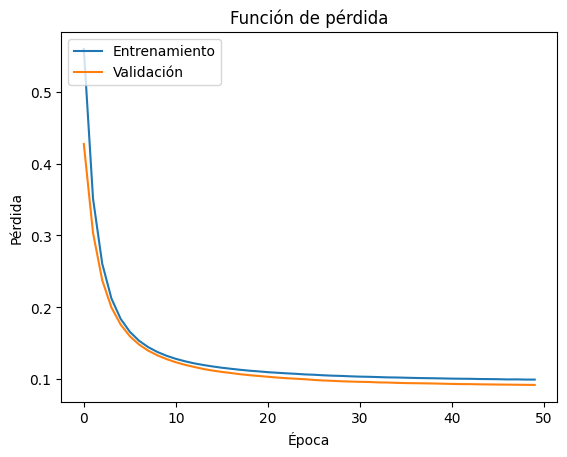

In [20]:
# graficar la función de pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Función de pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

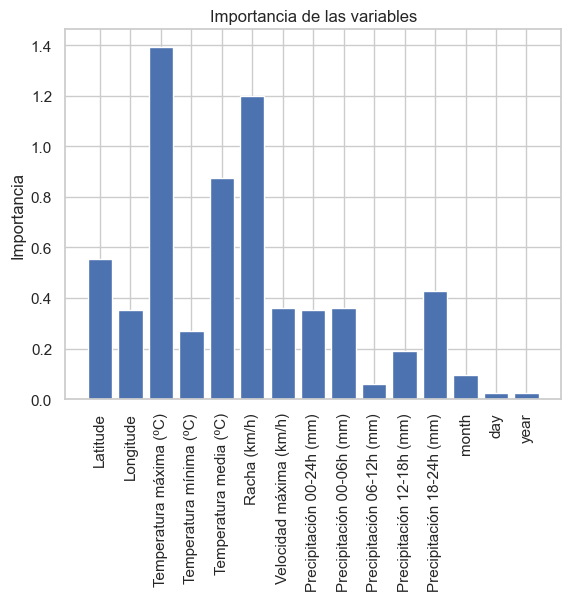

In [35]:
weights = model.get_weights()[0]

# calcular la importancia de cada variable
importance = np.mean(np.abs(weights), axis=1)

# crear la gráfica de barras
plt.bar(range(X.shape[1]), importance)
variables = ['Latitude', 'Longitude', 'Temperatura máxima (ºC)', 'Temperatura mínima (ºC)', 'Temperatura media (ºC)', 'Racha (km/h)', 'Velocidad máxima (km/h)', 'Precipitación 00-24h (mm)', 'Precipitación 00-06h (mm)', 'Precipitación 06-12h (mm)', 'Precipitación 12-18h (mm)', 'Precipitación 18-24h (mm)', 'month', 'day', 'year']

plt.xticks(range(X.shape[1]), variables, rotation=90)
plt.ylabel('Importancia')
plt.title('Importancia de las variables')
plt.show()

In [ ]:
model.save('model.h5')
model.save_weights('weights.h5')